In [1]:
# importing necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
# Reading the csv file
df=pd.read_csv("WA_Fn-UseC_-Accounts-Receivable.csv")

# Printing the first five rows
df.head(5)

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate
0,391,0379-NEVHP,4/6/2013,611365,1/2/2013,2/1/2013,55.94,No,1/15/2013,Paper,13,0
1,406,8976-AMJEO,3/3/2012,7900770,1/26/2013,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6
2,391,2820-XGXSB,1/26/2012,9231909,7/3/2013,8/2/2013,65.88,No,7/8/2013,Electronic,5,0
3,406,9322-YCTQO,4/6/2012,9888306,2/10/2013,3/12/2013,105.92,No,3/17/2013,Electronic,35,5
4,818,6627-ELFBK,11/26/2012,15752855,10/25/2012,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4


In [3]:
# For getting the dimension of the dataset (number of rows, number of coumns)
df.shape

(2466, 12)

In [4]:
# For getting the information about the null values and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 12 columns):
countryCode      2466 non-null int64
customerID       2466 non-null object
PaperlessDate    2466 non-null object
invoiceNumber    2466 non-null int64
InvoiceDate      2466 non-null object
DueDate          2466 non-null object
InvoiceAmount    2466 non-null float64
Disputed         2466 non-null object
SettledDate      2466 non-null object
PaperlessBill    2466 non-null object
DaysToSettle     2466 non-null int64
DaysLate         2466 non-null int64
dtypes: float64(1), int64(4), object(7)
memory usage: 231.3+ KB


In [5]:
# priting the number of unique values present in a columns
for label in df.columns:
    print("In Column",label,"there are",len(df[label].unique()),"unique values")
    print()

In Column countryCode there are 5 unique values

In Column customerID there are 100 unique values

In Column PaperlessDate there are 91 unique values

In Column invoiceNumber there are 2466 unique values

In Column InvoiceDate there are 681 unique values

In Column DueDate there are 681 unique values

In Column InvoiceAmount there are 2098 unique values

In Column Disputed there are 2 unique values

In Column SettledDate there are 695 unique values

In Column PaperlessBill there are 2 unique values

In Column DaysToSettle there are 67 unique values

In Column DaysLate there are 37 unique values



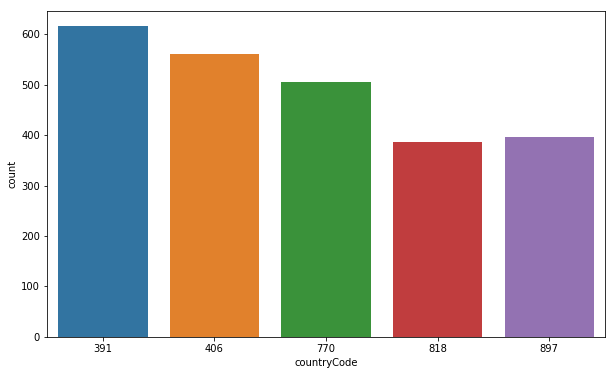

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(df.countryCode)

From the plot, We can say that maximum customer belongs to the country whose code is 391 followed by 406.

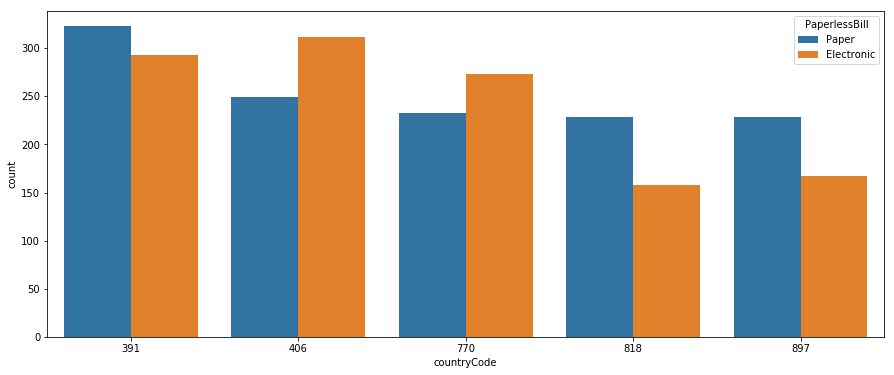

In [7]:
plt.figure(figsize=(15, 6))
sns.countplot(x="countryCode", hue="PaperlessBill", data=df)

From the plot, We can say that customers of country with code 391, 818 and 897 prefer Paper bill and customers of country with code 406 and 770 prefer Electronics bill.

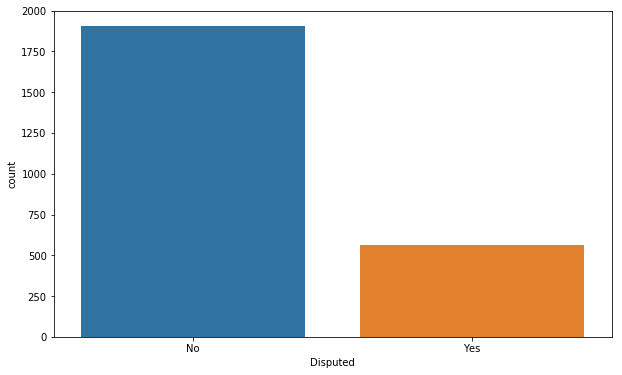

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(df.Disputed)

From the plot, We can say that maximum customers are not involved in Dispute.

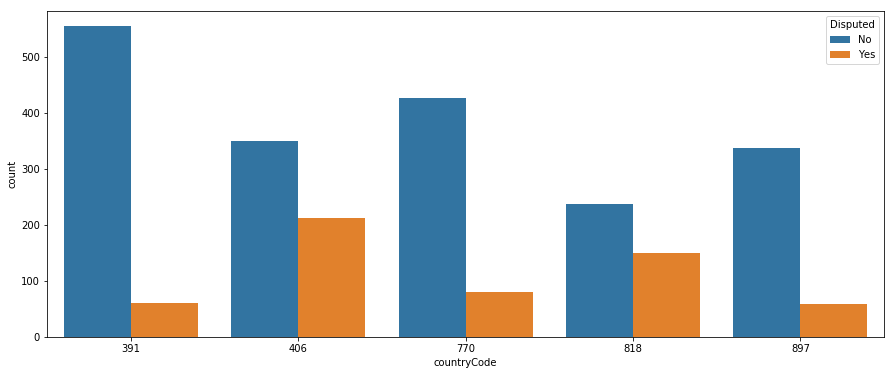

In [9]:
plt.figure(figsize=(15, 6))
sns.countplot(x="countryCode", hue="Disputed", data=df)

From the plot, We can say that each country have more number of customers who are not involved in Dispute.

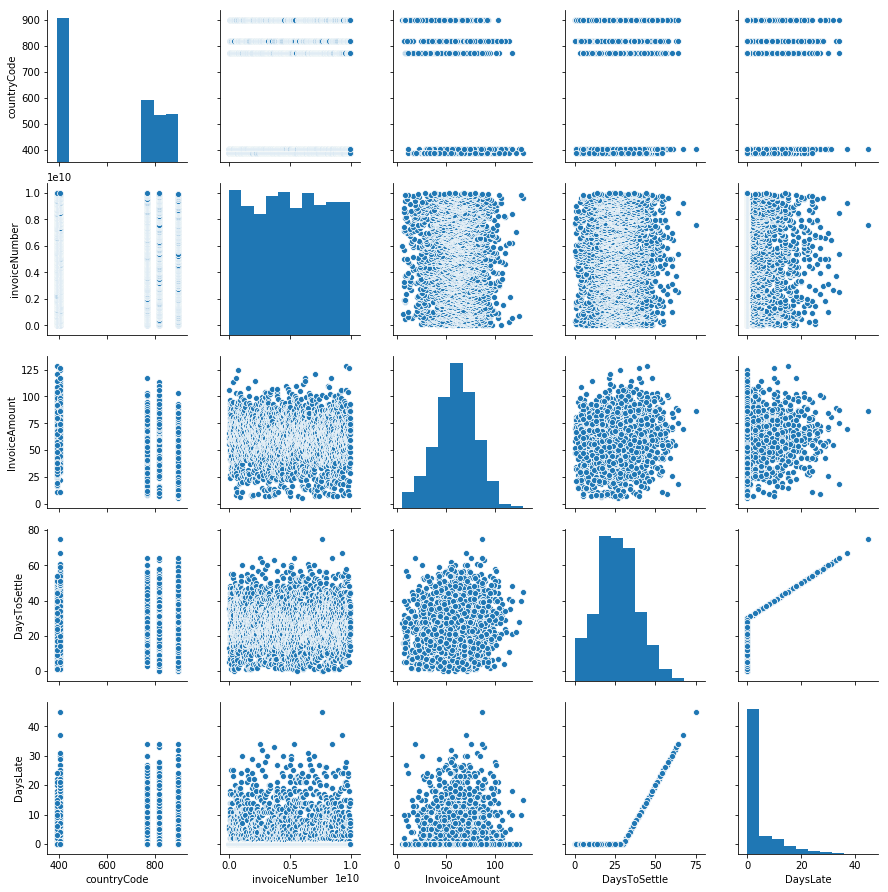

In [10]:
sns.pairplot(df)

We can get a high level overview of plots from pair plot, we can see which two features can well explain the data and then we can use scatter plot between those 2 features to explore further.

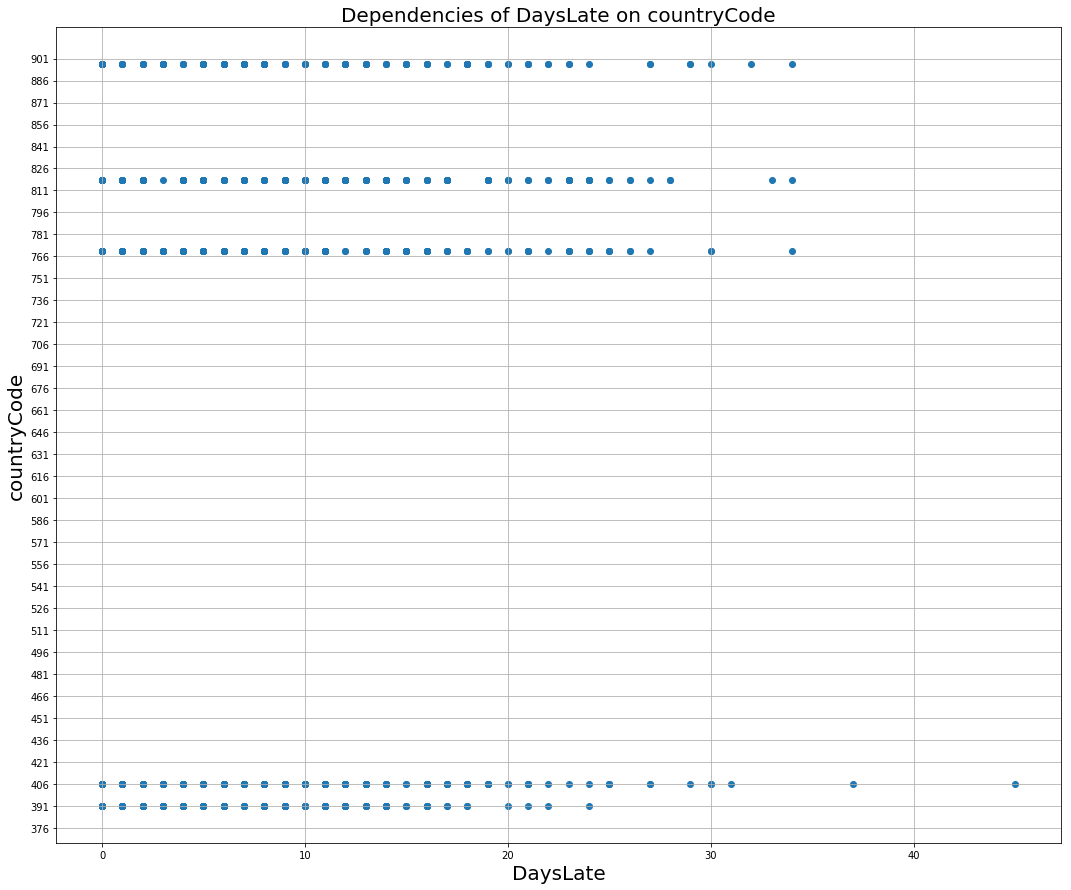

In [11]:
x_axis="DaysLate"
y_axis="countryCode"

plt.figure(figsize=(18, 15))
plt.scatter(df[x_axis], df[y_axis])
plt.yticks(range(int(min(df[y_axis]))-15, int(max(df[y_axis]))+15, 15))
plt.xticks(range(0, int(max(df[x_axis]))+2, 10))
plt.xlabel(x_axis, fontsize=20)
plt.ylabel(y_axis, fontsize=20)
plt.title("Dependencies of "+x_axis+" on "+y_axis, fontsize=20)
plt.grid()
plt.show()

Here from the plot we can see that if the countryCode is 391 then DaysLate is less

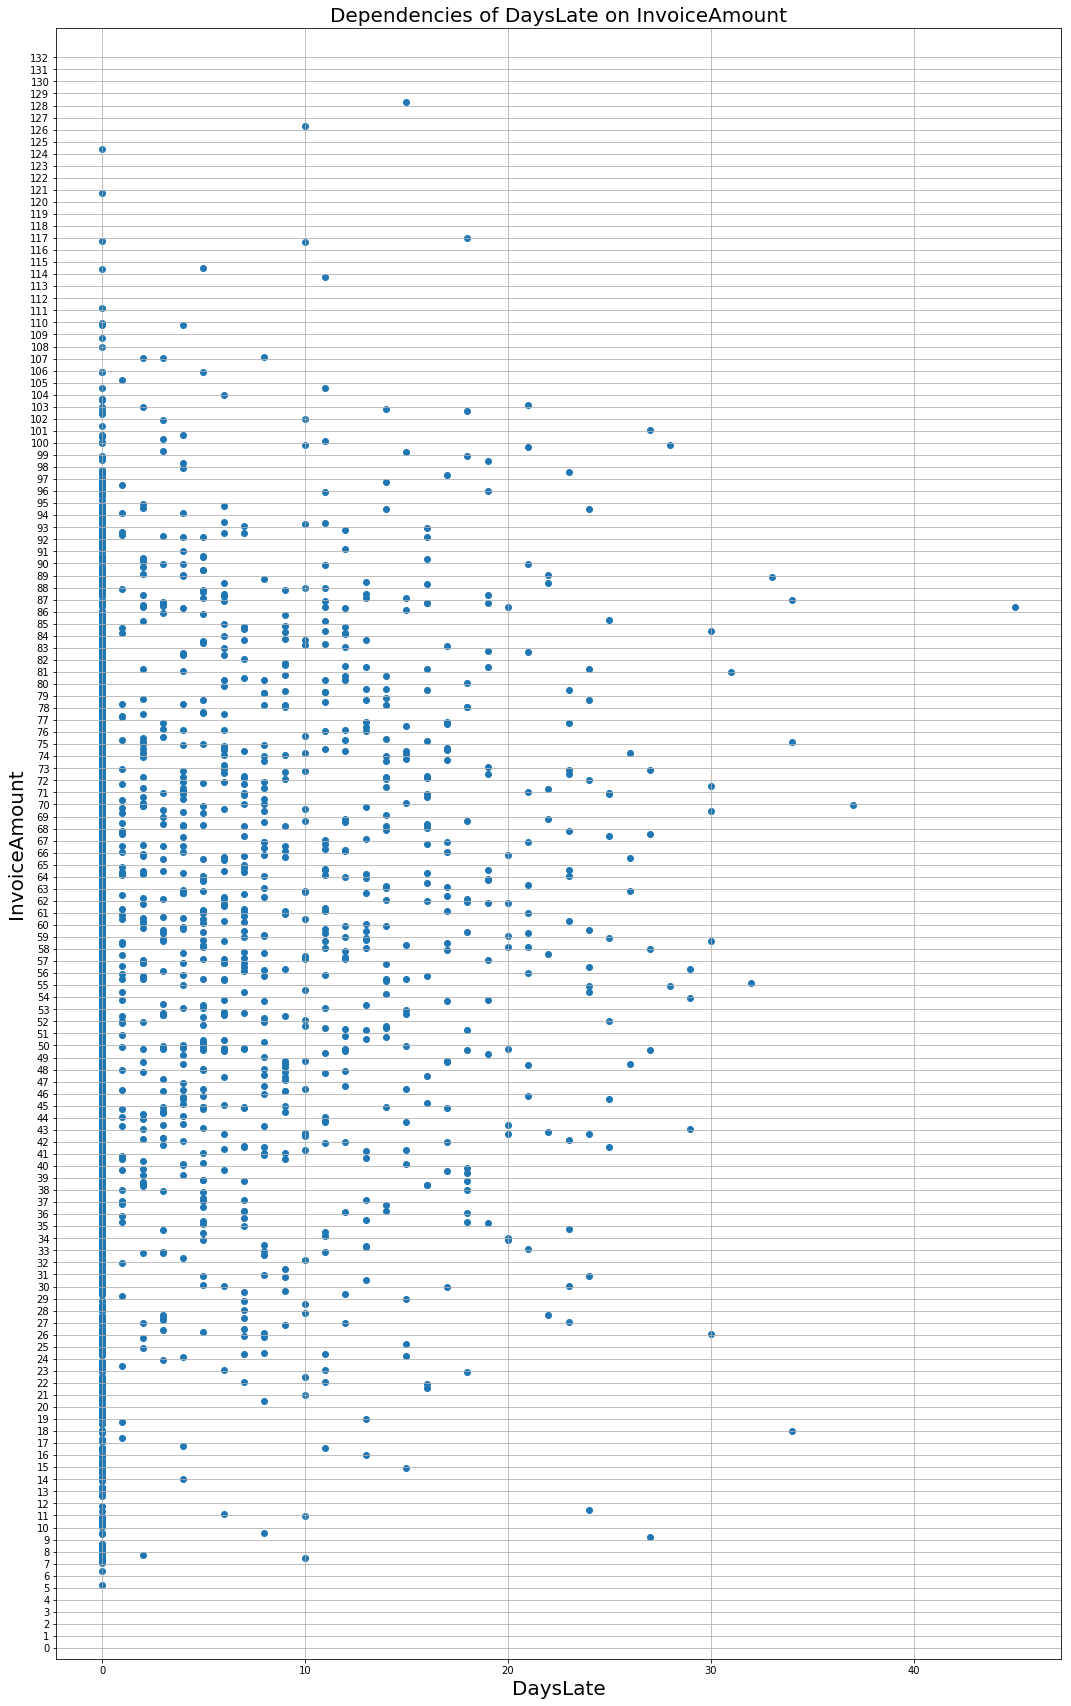

In [12]:
x_axis="DaysLate"
y_axis="InvoiceAmount"

plt.figure(figsize=(18, 30))
plt.scatter(df[x_axis], df[y_axis])
plt.yticks(range(int(min(df[y_axis]))-5, int(max(df[y_axis]))+5, 1))
plt.xticks(range(0, int(max(df[x_axis]))+2, 10))
plt.xlabel(x_axis, fontsize=20)
plt.ylabel(y_axis, fontsize=20)
plt.title("Dependencies of "+x_axis+" on "+y_axis, fontsize=20)
plt.grid()
plt.show()

Here from the plot we cannot conclude useful information because the plot is uniform, we can simply say that DaysLate is not highly dependent on invoiceAmount.

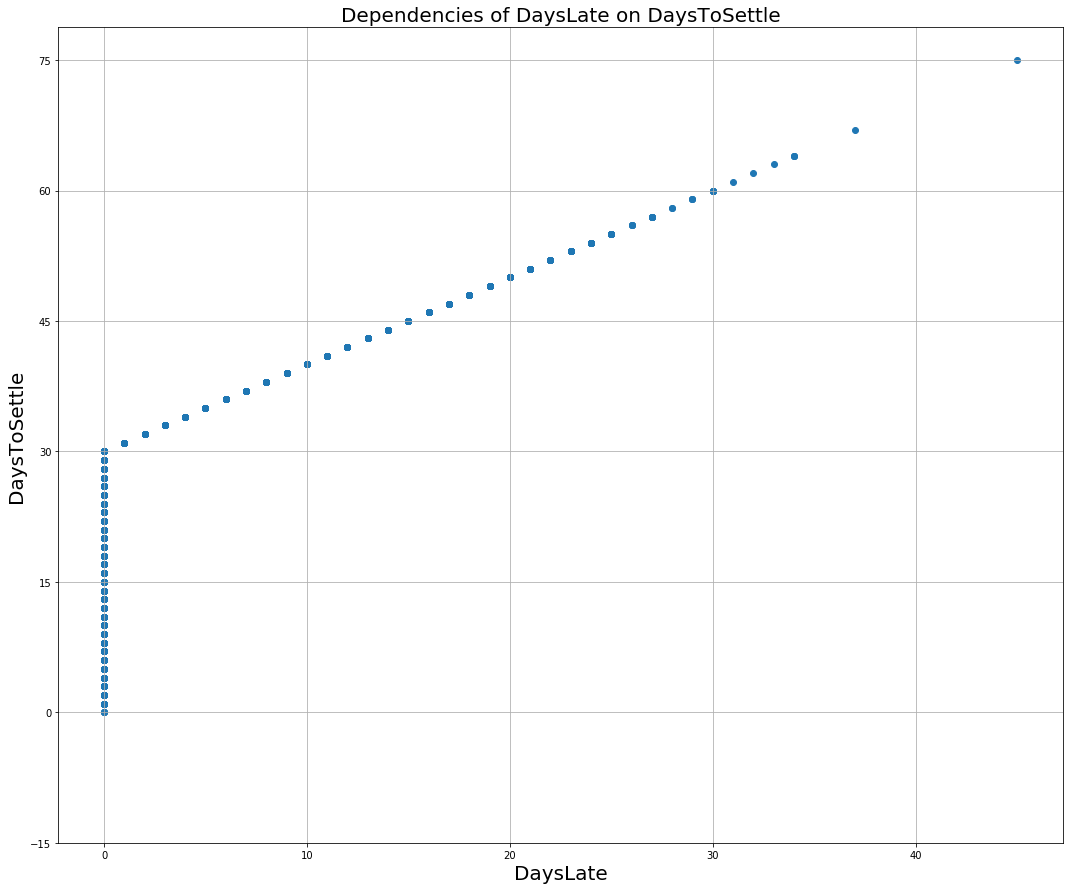

In [13]:
x_axis="DaysLate"
y_axis="DaysToSettle"

plt.figure(figsize=(18, 15))
plt.scatter(df[x_axis], df[y_axis])
plt.yticks(range(int(min(df[y_axis]))-15, int(max(df[y_axis]))+15, 15))
plt.xticks(range(0, int(max(df[x_axis]))+2, 10))
plt.xlabel(x_axis, fontsize=20)
plt.ylabel(y_axis, fontsize=20)
plt.title("Dependencies of "+x_axis+" on "+y_axis, fontsize=20)
plt.grid()
plt.show()

Here from the plot we can see that if the DaysToSettle is in the range of 0 to 30  then DaysLate is less(zero)

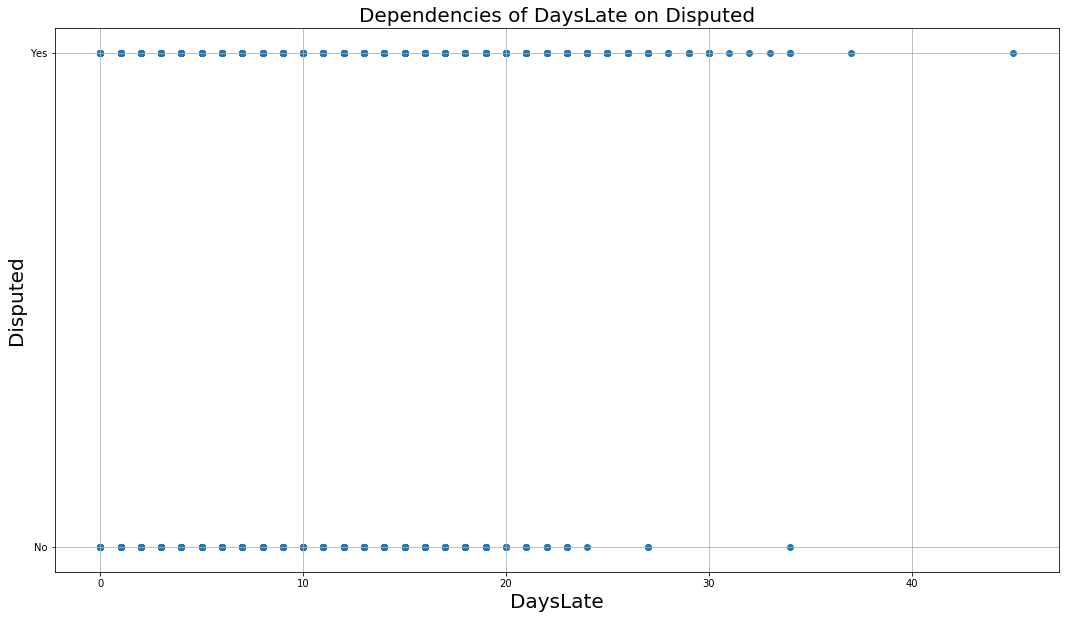

In [14]:
x_axis="DaysLate"
y_axis="Disputed"

plt.figure(figsize=(18, 10))
plt.scatter(df[x_axis], df[y_axis])
plt.xlabel(x_axis, fontsize=20)
plt.ylabel(y_axis, fontsize=20)
plt.title("Dependencies of "+x_axis+" on "+y_axis, fontsize=20)
plt.grid()
plt.show()

Here from the plot we can see that if Disputed value is No then DaysLate is less

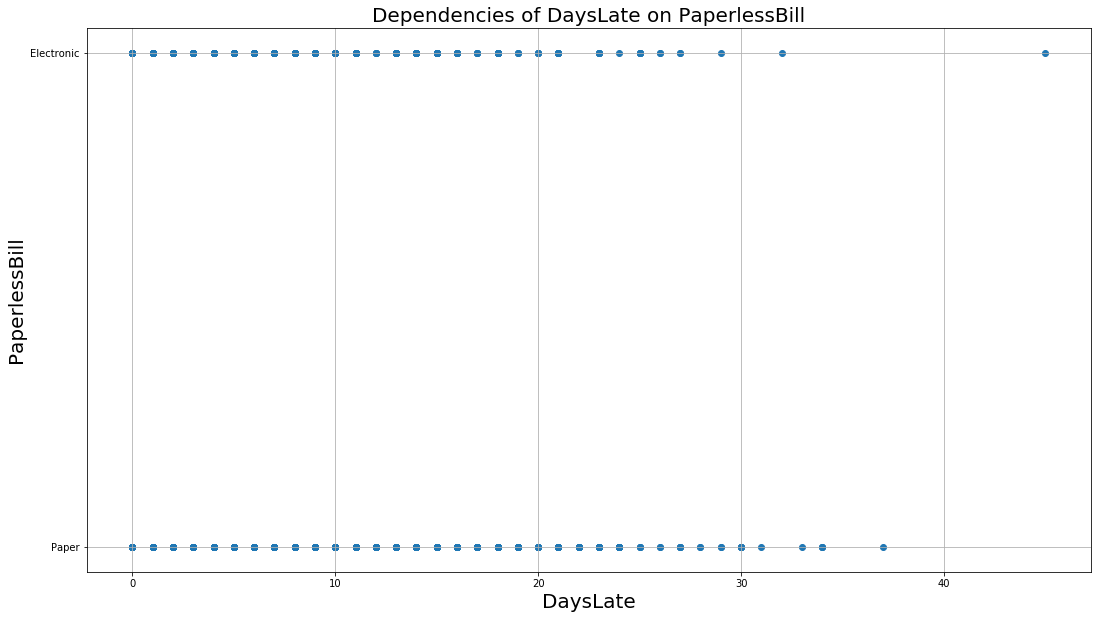

In [15]:
x_axis="DaysLate"
y_axis="PaperlessBill"

plt.figure(figsize=(18, 10))
plt.scatter(df[x_axis], df[y_axis])
plt.xlabel(x_axis, fontsize=20)
plt.ylabel(y_axis, fontsize=20)
plt.title("Dependencies of "+x_axis+" on "+y_axis, fontsize=20)
plt.grid()
plt.show()

Here from the plot we can see that if PaperlessBill value is Paper then DaysLate may be less

All the rest of the features are not important, so from the above analysis we can conclude that if the countryCode is 391, DaysToSettle is in the range of 0 to 30, Disputed value is No and PaperlessBill value is paper then there will be more chance that customers will pay fastest and recover more money and improve collections efficiency